**This file contains experiments same as peoplegrove1, with only change of introducing rare categories in dataset.**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
from sklearn import model_selection
%matplotlib inline

In [ ]:
data=pd.read_csv('pg_recommendation_data.csv')

In [ ]:
data.head()

,mentee_major,mentee_help_topics,mentee_experitse,mentor_major,mentor_help_topics,mentor_experitse,final_match
0,['Accounting and Financial Management'],"['Life Skills', 'Cover Letter Review', 'Career...",['Accounting'],['Accounting and Financial Management'],"['Parenting vs. Career', 'Career / Industry Tr...","['Finance', 'Accounting']",1
1,['Information Systems Management'],"['Working Overseas', 'Life Skills', 'Startups'...","['Food & Restaurants', 'Law', 'Computer - IT S...","['Information Systems Management', 'Project Ma...","['Leadership Skills', 'Working Overseas', 'Per...","['Trade (Wholesale)', 'Government / Public Adm...",0
2,"['Cybersecurity Technology', 'Computer Network...","['Leadership Skills', 'Personal and Profession...","['Military & Defense', 'Technology', 'Computer...","['Cybersecurity Technology', 'Computer Network...","['Management', 'Resume / CV Review', 'Career /...","['Government / Public Admin', 'Computer - IT S...",1
3,['Masters of Human Resources Management'],[],['Human Resources'],['Business Administration'],"['Leadership Skills', 'Life Skills', 'Intervie...","['Human Resources', 'Advertising / Marketing',...",0
4,['Sociology'],"['Leadership Skills', 'Life Skills', 'Manageme...",['Healthcare'],['Business Administration'],"['Leadership Skills', 'Working Overseas', 'Per...","['Human Resources', 'Computer - Hardware', 'Fi...",0


In [ ]:
columns=data.columns
data.shape

(48882, 7)

In [ ]:
def process(data):
  cols=data.columns
  for i in range(len(data)):
    for col in cols:
      if data.loc[i,col] == '[]':
        data.loc[i,col]='[None]'
  for col in cols:
    if col != 'final_match':
      data[col]=data[col].apply(eval)
  return data


In [ ]:
data=process(data)

In [ ]:
def count_dict(data,col):
  cat_dict={}
  for i,row in data.iterrows():
    for word in row[col]:
      if word not in cat_dict:
        cat_dict[word]=1
      else:
        cat_dict[word] +=1
  return cat_dict

In [ ]:
def rare_insert(data,col,dic):
  for i,row in data.iterrows():
    for ind,word in enumerate(row[col]):
      if dic[word] < 5:
        data.loc[i,col][ind]='RARE'
  return data

In [ ]:
def impute_values(data,col,final_dict):
  for j,row in data.iterrows():
    for i in range(len(row[col])):
      if row[col][i] in final_dict:
        row[col][i]=int(final_dict[row[col][i]])
      else:
        row[col][i]=0
    
    m=max(row[col])
    data.loc[j,col]=m
  data[col]=data[col].astype('int')
  return data


The below  cell will need 8-9 minutes of runtime on colab with cpu

In [ ]:
dictionary=[]
for col in columns:
  if col != 'final_match':
    cat_d=count_dict(data, col)
    data=rare_insert(data,col,cat_d)
    final_cat=count_dict(data,col)
    dictionary.append(final_cat)
    data=impute_values(data,col,final_cat)

In [ ]:
data.head()

,mentee_major,mentee_help_topics,mentee_experitse,mentor_major,mentor_help_topics,mentor_experitse,final_match
0,1232,14281,4139,945,22218,11409,1
1,1156,7908,12085,2641,23570,18223,0
2,4403,8472,12085,4296,22218,18223,1
3,107,16082,7782,6263,23570,14117,0
4,1109,14281,7295,6263,23570,18223,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48882 entries, 0 to 48881
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   mentee_major        48882 non-null  int64
 1   mentee_help_topics  48882 non-null  int64
 2   mentee_experitse    48882 non-null  int64
 3   mentor_major        48882 non-null  int64
 4   mentor_help_topics  48882 non-null  int64
 5   mentor_experitse    48882 non-null  int64
 6   final_match         48882 non-null  int64
dtypes: int64(7)
memory usage: 2.6 MB


In [ ]:
data.to_csv('tranformed_data.csv',index=False)

In [ ]:
for i in range(6):
  print('feature {} will have now {} categories'.format(columns[i],len(dictionary[i])))

feature mentee_major will have now 1070 categories
feature mentee_help_topics will have now 26 categories
feature mentee_experitse will have now 57 categories
feature mentor_major will have now 1187 categories
feature mentor_help_topics will have now 26 categories
feature mentor_experitse will have now 57 categories


In [ ]:
dictionary[3]['RARE']

2835

In [ ]:
df=data.copy()

In [ ]:
df=df.sample(frac=1).reset_index(drop=True)

In [ ]:
df.corr()

,mentee_major,mentee_help_topics,mentee_experitse,mentor_major,mentor_help_topics,mentor_experitse,final_match
mentee_major,1.000000,-0.067084,0.187127,0.206789,0.027194,0.101511,0.099726
mentee_help_topics,-0.067084,1.000000,-0.018860,-0.014690,-0.134507,-0.129020,-0.229415
mentee_experitse,0.187127,-0.018860,1.000000,0.129121,0.102770,0.265316,0.032055
mentor_major,0.206789,-0.014690,0.129121,1.000000,0.042621,0.096416,-0.044676
mentor_help_topics,0.027194,-0.134507,0.102770,0.042621,1.000000,0.468873,-0.047357
mentor_experitse,0.101511,-0.129020,0.265316,0.096416,0.468873,1.000000,-0.033415
final_match,0.099726,-0.229415,0.032055,-0.044676,-0.047357,-0.033415,1.000000


In [ ]:
df1=df.copy()

In [ ]:
from sklearn.feature_selection import VarianceThreshold
var_thresh = VarianceThreshold(threshold=0.1)
transformed_data = var_thresh.fit_transform(df1)

In [ ]:
transformed_data[0]

array([ 1156,  8472, 12085,  2641, 23570, 18223,     0])

In [ ]:
from sklearn import model_selection,preprocessing,metrics
from sklearn import ensemble
from xgboost import XGBClassifier
from sklearn import linear_model

In [ ]:
y=df['final_match']
X=df.drop(['final_match'],axis=1)

In [ ]:
print(X.shape,"\n",y.shape)

(48882, 6) 
 (48882,)


In [ ]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=0)

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(39105, 6) (9777, 6) (39105,) (9777,)


In [ ]:
def log_reg():
  model_lr = linear_model.LogisticRegression()
  model_lr.fit(X_train.values,y_train.values)
  pred_tr=model_lr.predict(X_train)
  pred=model_lr.predict(X_test)
  print("accuracy",metrics.accuracy_score(y_test,pred))
  print("train accuracy",metrics.accuracy_score(y_train,pred_tr))

In [ ]:
log_reg()

accuracy 0.5832054822542703
train accuracy 0.58120444955888


In [ ]:
xt=X_train[['mentee_major','mentor_major']]
xtt=X_test[['mentee_major','mentor_major']]
model_lr1 = linear_model.LogisticRegression()
model_lr1.fit(xt,y_train.values)
pred_tr=model_lr1.predict(xt)
pred=model_lr1.predict(xtt)
print("accuracy",metrics.accuracy_score(y_test,pred))
print("train accuracy",metrics.accuracy_score(y_train,pred_tr))

accuracy 0.5499642016978623
train accuracy 0.5488812172356476


In [ ]:
def random_forest(n_estimators,depth):
  model=ensemble.RandomForestClassifier(n_estimators=n_estimators,max_depth=depth,random_state=0)
  model.fit(X_train,y_train)
  pred=model.predict(X_test)
  pred_tr=model.predict(X_train)
  valid_acc=metrics.accuracy_score(y_test,pred)
  train_acc=metrics.accuracy_score(y_train,pred_tr)
  print("accuracy",metrics.accuracy_score(y_test,pred))
  #print('auc',metrics.roc_auc_score(y_test,pred))
  print("train accuracy",metrics.accuracy_score(y_train,pred_tr))
  return model,train_acc,valid_acc

In [ ]:
estimators=[50,100,200,300,400,500]
trainn=[]
testt=[]
for est in estimators:
  _,a,b=random_forest(est,6)
  trainn.append(a)
  testt.append(b)
  print('\n')

accuracy 0.7211823667791756
train accuracy 0.7137961897455568


accuracy 0.7207732433261737
train accuracy 0.713463751438435


accuracy 0.7210800859159251
train accuracy 0.7128244470016621


accuracy 0.7210800859159251
train accuracy 0.7133870349060223


accuracy 0.7213869285056765
train accuracy 0.7133870349060223


accuracy 0.7217960519586786
train accuracy 0.7135916123257895




In [ ]:
from matplotlib.legend_handler import HandlerLine2D
def plott(ta,va,param,namex):
  line1, = plt.plot(param, ta, 'b', label='Train ACC')
  line2, = plt.plot(param, va, 'r', label='Test ACC')
  plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
  plt.ylabel('ACCURACY')
  plt.xlabel(namex)
  plt.show()

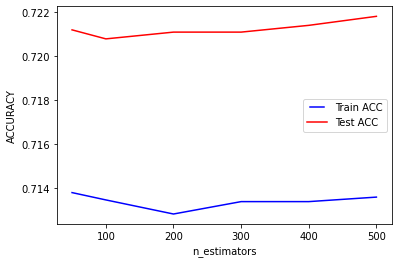

In [ ]:
plott(trainn,testt,estimators,'n_estimators')

In [ ]:
train_accur=[]
valid_accur=[]
max_depth1=[4,6,8,10,12,15,18]
for depth in max_depth1:
  _,a,b=random_forest(200,depth)
  train_accur.append(a)
  valid_accur.append(b)
  print("\n")

accuracy 0.7146363915311446
train accuracy 0.703618463112134


accuracy 0.7210800859159251
train accuracy 0.7128244470016621


accuracy 0.7304899253349698
train accuracy 0.7292162127605165


accuracy 0.7380587092155058
train accuracy 0.7483186293312876


accuracy 0.7473662677713
train accuracy 0.7826620636747219


accuracy 0.7486959189935563
train accuracy 0.8395090141925585


accuracy 0.7462411782755446
train accuracy 0.8969185526147552




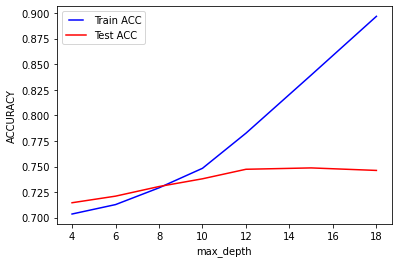

In [ ]:
plott(train_accur,valid_accur,max_depth1,'max_depth')

In [ ]:
final_modl,_,_1=random_forest(200,12)

accuracy 0.7473662677713
train accuracy 0.7826620636747219


In [ ]:
final_modl,_,_1=random_forest(300,12)

accuracy 0.7477753912243019
train accuracy 0.7829945019818437


In [ ]:
print(final_modl)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


In [ ]:
from xgboost import XGBClassifier
from sklearn import linear_model

In [ ]:
def model_xgb(depth,est,rte):
  modelxg=XGBClassifier(max_depth=depth,learning_rate=rte,n_estimators=est,random_state=0)
  modelxg.fit(X_train,y_train,early_stopping_rounds=5,eval_set=[(X_test,y_test)],verbose=False)
  pred_tr=modelxg.predict(X_train)
  pred=modelxg.predict(X_test)
  valid_acc=metrics.accuracy_score(y_test,pred)
  train_acc=metrics.accuracy_score(y_train,pred_tr)
  print("accuracy",metrics.accuracy_score(y_test,pred))
  #print('auc',metrics.roc_auc_score(y_test,pred))
  print("train accuracy",metrics.accuracy_score(y_train,pred_tr))
  return modelxg,train_acc,valid_acc

In [ ]:
train_accuracy=[]
valid_accuracy=[]
max_depth=[4,6,8,10,12,15]
for depth in max_depth:
  _,a,b=model_xgb(depth,500,0.1)
  train_accuracy.append(a)
  valid_accuracy.append(b)
  print("\n")

accuracy 0.7178070982919096
train accuracy 0.7095767804628564


accuracy 0.7428659097882786
train accuracy 0.748216340621404


accuracy 0.7376495857625038
train accuracy 0.7427694668200997


accuracy 0.7604582182673622
train accuracy 0.8058048842858969


accuracy 0.758719443592104
train accuracy 0.8334484081319524


accuracy 0.7430704715147796
train accuracy 0.8265439202148063




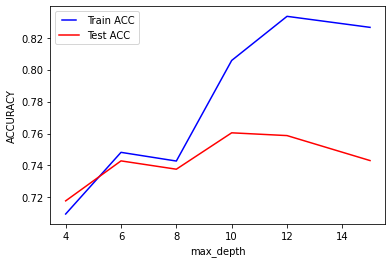

In [ ]:
plott(train_accuracy,valid_accuracy,max_depth,'max_depth')

In [ ]:
learning_rate=[0.05,0.01,0.1,0.15]
tr=[]
tes=[]
for lr in learning_rate:
  _,a,b=model_xgb(12,500,lr)
  tr.append(a)
  tes.append(b)
  print("\n")

accuracy 0.7368313388565
train accuracy 0.7755785705152793


accuracy 0.736013091950496
train accuracy 0.7742999616417338


accuracy 0.758719443592104
train accuracy 0.8334484081319524


accuracy 0.7583103201391019
train accuracy 0.826339342795039




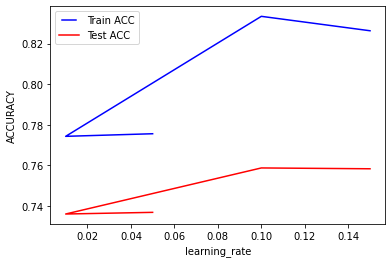

In [ ]:
plott(tr,tes,learning_rate,'learning_rate')

In [ ]:
final_model2,_,_1=model_xgb(10,500,0.1)

accuracy 0.7604582182673622
train accuracy 0.8058048842858969


In [ ]:
print(final_model2)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


#Testing any new data

First step is to store location of the csv file in below url, and then execute the cells below to get predictions on this data. 

In [ ]:
url=''

In [ ]:
test_data=pd.read_csv(url)

In [ ]:
features=test_data.columns

In [ ]:
def check_data(data,col,dic):
  for i,row in data.iterrows():
    for ind,word in enumerate(row[col]):
      if word not in dic:
        data.loc[i,col][ind]='RARE'
  return data

In [ ]:
test_data=process(test_data)

In [ ]:
for i in range(len(features)):
  if features[i] != 'final_match':
    test_data=check_data(test_data,features[i],dictionary[i])
    test_data=impute_values(test_data,features[i],dictionary[i])

In [ ]:
test_data=test_data.drop(['final_match'],axis=1)

In [ ]:
finalpred=final_model2.predict(test_data)
